In [1]:
import pprint as pp
import os
import sys
import pandas as pd
import numpy as np
from importlib import reload 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Update path 
"""

sys.path.append("../")

In [22]:
"""
Local imports
"""

import imagePipeline.data_io.loaders as _read
import imagePipeline.data_io.writers as _write
import imagePipeline.preprocess.transform as _prep

In [4]:
%time
"""
Load the parameter file into memory
"""
params = _read.load_params(params_path="../inputs/proliferation_params.json")

"""
load the CZIs from the data directory
"""
reload(_read)

loader = _read.cziLoader(params)  
czi, metadata = loader.get_item(index=0)

print("done.")

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 6.68 µs
done.


In [6]:
# pp.pprint(metadata)

In [9]:
%time

reload(_prep)

params = _read.load_params(params_path="../inputs/proliferation_params.json")
transformer = _prep.ParallelTransformer(params, metadata)

TEST_IMG = czi.data[:, 0:10, :, :, :, :]

print(TEST_IMG.shape)

processed = transformer.process(czi_data=TEST_IMG)
print(f"chain: {transformer.chain}")
print(processed.shape)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
(1, 10, 4, 30, 472, 652)
chain: ['ball', 'gamma', 'dilate', 'rescale']
(1, 10, 4, 30, 472, 652)


(-0.5, 651.5, 471.5, -0.5)

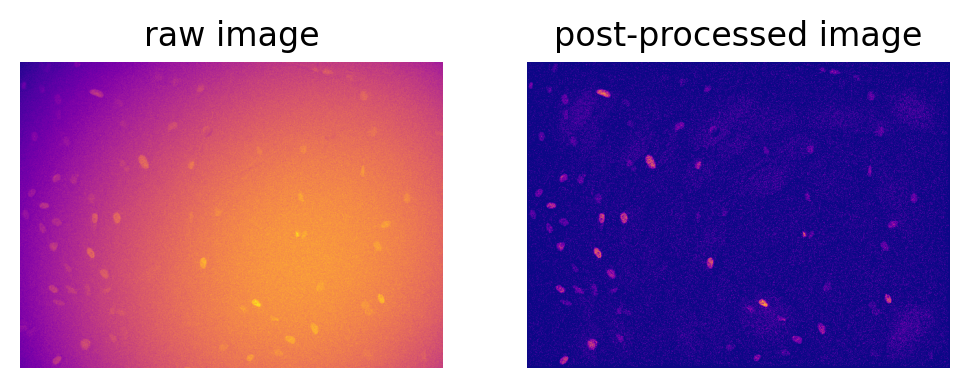

In [11]:
matplotlib.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(nrows=1, ncols=2)

t = 1
tile = 6 
c = 1

raw_img = TEST_IMG[0, t, c, tile, :, :]
processed_img = processed[0, t, c, tile, :, :]

CMAP = 'plasma'

ax[0].imshow(raw_img, cmap=CMAP)
ax[0].set_title("raw image")
ax[0].axis(False)

ax[1].imshow(processed_img, cmap=CMAP)
ax[1].set_title("post-processed image")
ax[1].axis(False)

Text(0.5, 1.0, 'processed image')

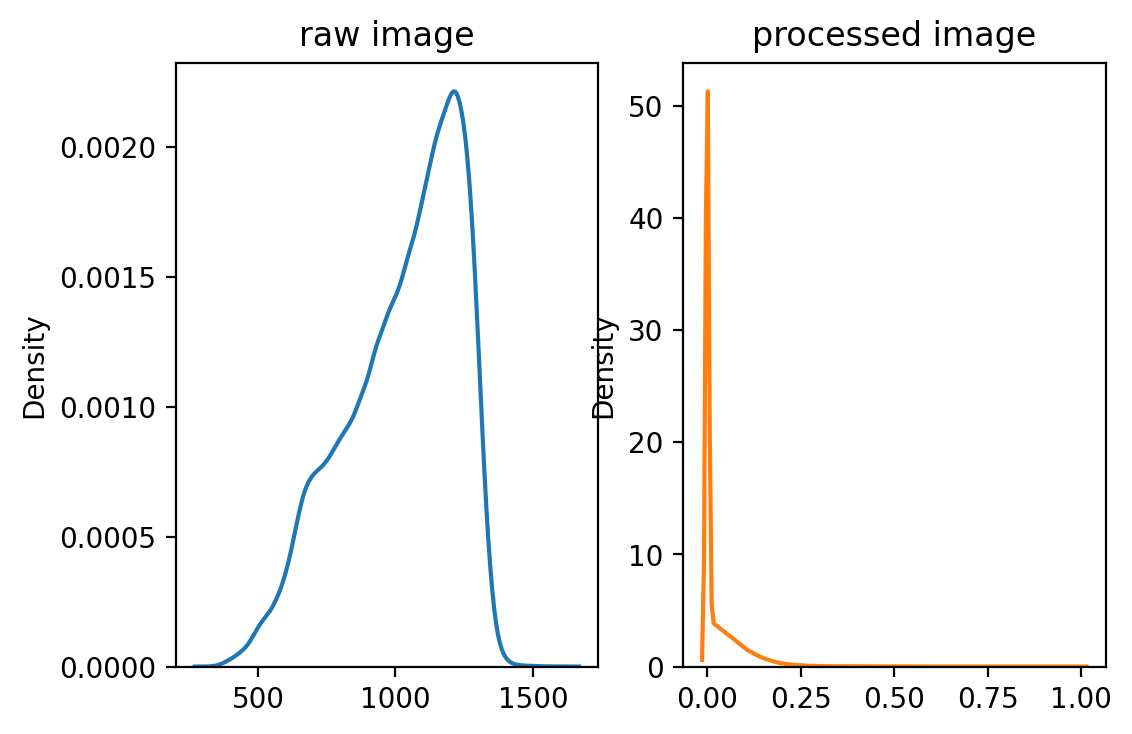

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(raw_img.flatten(), ax=ax[0])
ax[0].set_title('raw image')

sns.kdeplot(processed_img.flatten(), ax=ax[1], color='C1')
ax[1].set_title('processed image')

In [47]:
%time
reload(_prep)

params = _read.load_params(params_path="../inputs/proliferation_params.json")
transformer = _prep.ParallelTransformer(params, metadata)

stitched = transformer.stitch(processed)
print(stitched.shape)
print("done.")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs
(10, 4, 1, 2360, 3912)
done.


Text(0.5, 1.0, 'Stitched Image')

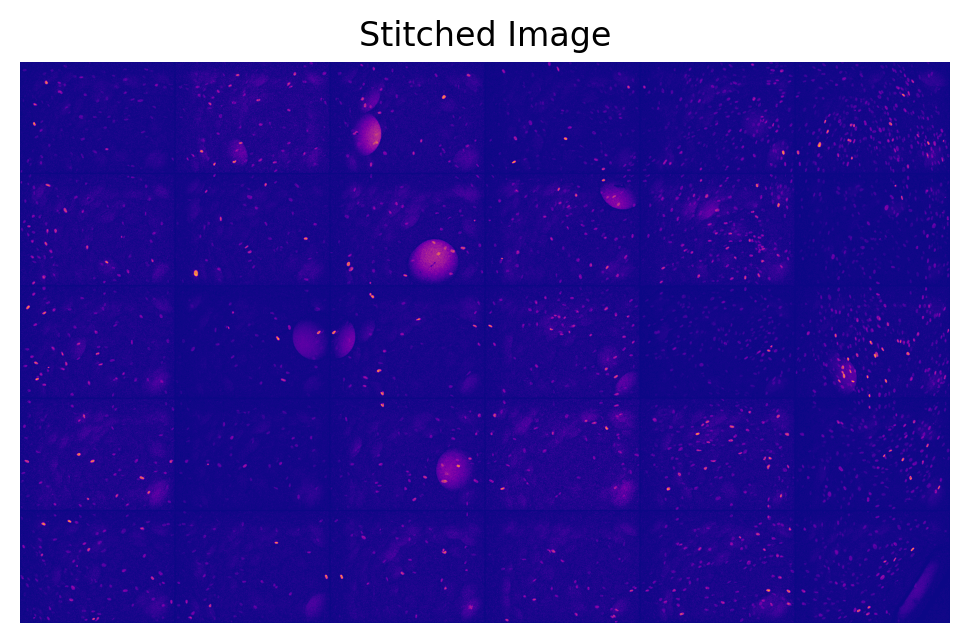

In [48]:
t = 1
c = 1

stitched_img = stitched[t, c, 0, :, :]

plt.imshow(stitched_img, cmap=CMAP)
plt.axis(False)
plt.title("Stitched Image")

In [56]:
%time
reload(_write)

writer = _write.OutputWriter(params, metadata)

# save parameters 
writer.save_params()
print()

# save metadata
writer.save_metadata()
print()

# save ome_tiff
writer.write_ome(TEST_IMG)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs
Saved: `/home/cstansbu/GIT_REPOSITORIES/cell_tracking/outputs/PARAMETERS_2015-05-13-20-Scene12-D3.json`

Saved: `/home/cstansbu/GIT_REPOSITORIES/cell_tracking/outputs/METADATA_2015-05-13-20-Scene12-D3.json`
saved: /home/cstansbu/GIT_REPOSITORIES/cell_tracking/outputs/OME_2015-05-13-20-Scene12-D3.tiff
